In [79]:
import pandas as pd
import librosa
from matplotlib import pyplot as plt
import numpy as np


PATH_TO_INPUT_DATA = "/Users/simonmyhre/workdir/gitdir/sqml/projects/sm_multiclass_masters_project/pull_data/cache/datav3"
df = pd.read_csv(PATH_TO_INPUT_DATA + "/data.csv")

print(df.head(5))


                        sqbundle_id  wav_duration_sec  label_duration_sec  \
0  32500921bfa969d37d0b36240f8e59d8         24.422369           24.422369   
1  340dd60b47d2e8d17d4ab6f7c81684f9         75.401442           38.190698   
2  340dd60b47d2e8d17d4ab6f7c81684f9         75.401442           36.195621   
3  340dd60b47d2e8d17d4ab6f7c81684f9         75.401442            1.015123   
4  399328d9efc94ec8cba799ffcaac4eec         36.592857           36.592857   

   label_relative_start_sec  label_relative_end_sec                label  \
0                  0.000000               24.422369  electric_quad_drone   
1                  0.000000               38.190698  electric_quad_drone   
2                 38.190698               74.386319  electric_quad_drone   
3                 74.386319               75.401442  electric_quad_drone   
4                  0.000000               36.592857  electric_quad_drone   

                              file_name  
0  b38b70ca19ee224c3ba056f0de71de2b.wa

In [80]:
# Get the unique labels
labels = df["label"].unique()
labels

array(['electric_quad_drone', 'racing_drone', 'electric_fixedwing_drone',
       'petrol_fixedwing_drone', 'dvc_non_drone', 'animal', 'speech',
       'TUT_dcase', 'nature_chernobyl'], dtype=object)

In [81]:
"""Utils"""
def load_wav_file(filename):
    wav, sr = librosa.load(
                    PATH_TO_INPUT_DATA + "/wavs/" + filename , sr=44100)
    return wav

def get_window_of_wav(wav, start_sec, end_sec, sample_rate: int = 44100):
    start_frame = int(start_sec * sample_rate)
    end_frame = int(end_sec * sample_rate)
    return wav[start_frame:end_frame]

def to_log_mel_spectrogram(wav: np.ndarray, sample_rate: int, n_mels: int = 512, n_fft: int = 4096, hop_length: int = 512, fmin: int = 100, fmax: int = 6500):
        mel_spectrogram = librosa.feature.melspectrogram(
            y=wav,
            sr=sample_rate,
            n_mels=n_mels,
            n_fft=n_fft,
            hop_length=hop_length,
            fmin=fmin,
            fmax=fmax,
        )
        log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
        return log_mel_spectrogram

def plot_spectrogram(spectrogram, duration = 2.0):
    fig = plt.figure(figsize=(10, 4))
    plt.imshow(spectrogram, aspect='auto', origin='lower', extent=[0, duration, 100, 6500])
    plt.colorbar(format='%+2.0f dB')
    # plt.title('Log-Mel Spectrogram')
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time (s)')
    plt.tight_layout()
    plt.show()
    return fig

def save_figure(figure, filename):
    figure.savefig(filename, bbox_inches='tight', pad_inches=0)
    print(f"Saved figure as {filename}")

def normalize_audio_energy(audio, target_energy=1.0):
    # Calculate the current energy of the audio
    current_energy = np.sum(np.square(audio))
    # Calculate the normalization factor
    # Avoid division by zero by adding a small epsilon
    normalization_factor = np.sqrt(target_energy / (current_energy + 1e-10))
    # Normalize the audio by the normalization factor
    normalized_audio = audio * normalization_factor

    return normalized_audio



    

/Users/simonmyhre/workdir/gitdir/skyline/skylinevenv/lib/python3.10/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


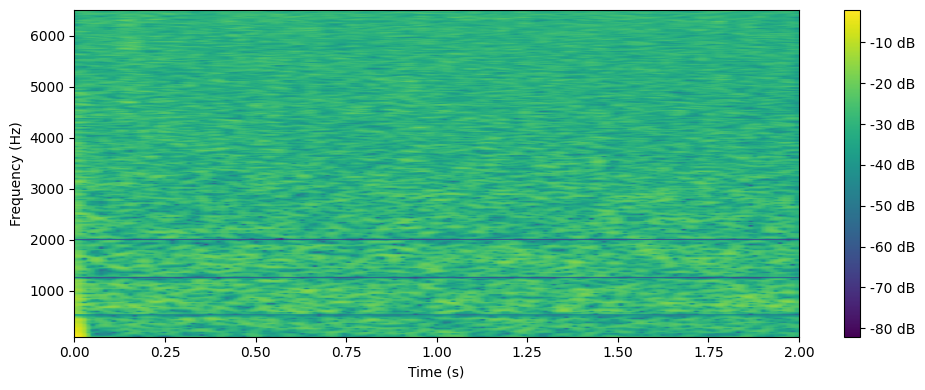

Saved figure as some_spectrogram.png


In [82]:
# Get a filename where label is nature_chernobyl
filename = df[df["label"] == "nature_chernobyl"]["file_name"].values[0]
wav = load_wav_file(filename)
wav = get_window_of_wav(wav, 0, 2)
wav = normalize_audio_energy(wav)

spectrogram = to_log_mel_spectrogram(wav, 44100)

figure = plot_spectrogram(spectrogram)
save_figure(figure, "some_spectrogram.png")


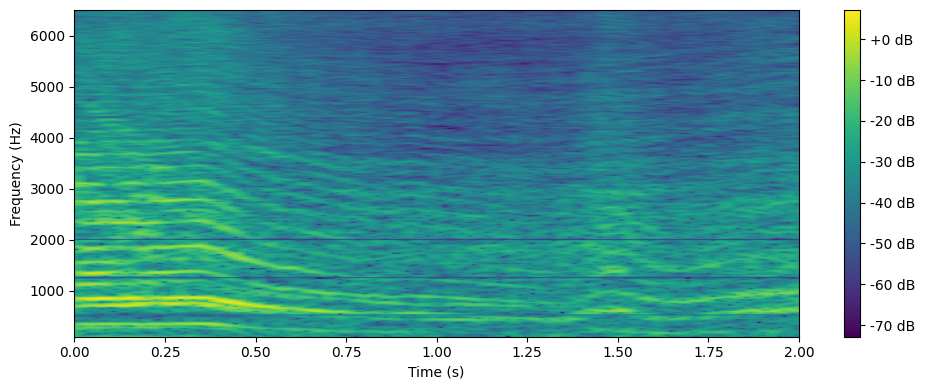

Saved figure as spectogram_electric_quad_drone.png


In [83]:
# Get a filename where label is nature_chernobyl
filename = df[df["label"] == "electric_quad_drone"]["file_name"].values[200]
filename
wav = load_wav_file(filename)
wav = get_window_of_wav(wav, 1, 3)
wav = normalize_audio_energy(wav)
spectrogram = to_log_mel_spectrogram(wav, 44100)
figure = plot_spectrogram(spectrogram)
save_figure(figure, "spectogram_electric_quad_drone.png")

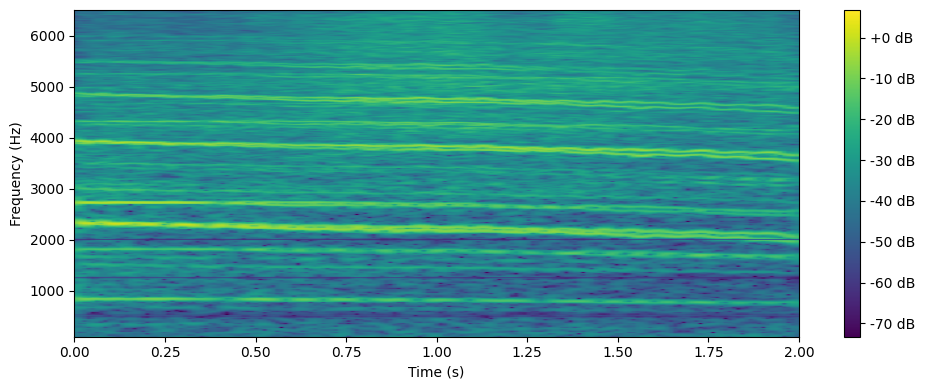

Saved figure as spectrogram_racing_drone.png


In [84]:
# Get a filename where label is nature_chernobyl
filename = df[df["label"] == "racing_drone"]["file_name"].values[0]
filename
wav = load_wav_file(filename)
wav = get_window_of_wav(wav, 11, 13)
wav = normalize_audio_energy(wav)
spectrogram = to_log_mel_spectrogram(wav, 44100)
figure = plot_spectrogram(spectrogram)
save_figure(figure, "spectrogram_racing_drone.png")

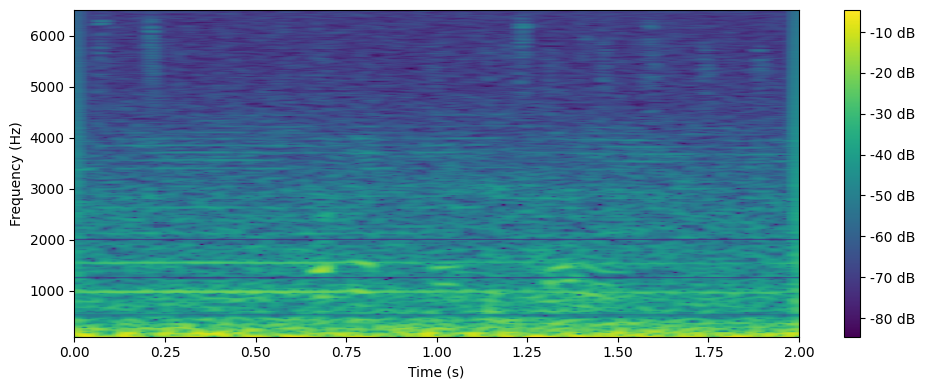

Saved figure as spectrogram_electric_fixedwing_drone.png


In [85]:
# Get a filename where label is nature_chernobyl
filename = df[df["label"] == "electric_fixedwing_drone"]["file_name"].values[0]
filename
wav = load_wav_file(filename)
wav = get_window_of_wav(wav, 6, 8)
wav = normalize_audio_energy(wav)
spectrogram = to_log_mel_spectrogram(wav, 44100)
figure = plot_spectrogram(spectrogram)
save_figure(figure, "spectrogram_electric_fixedwing_drone.png")

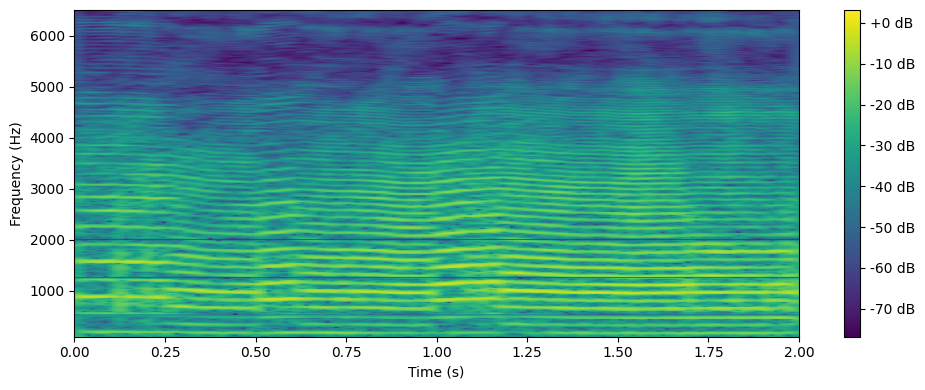

Saved figure as spectrogram_petrol_fixedwing_drone.png


In [86]:
# Get a filename where label is nature_chernobyl
filename = df[df["label"] == "petrol_fixedwing_drone"]["file_name"].values[0]
filename
wav = load_wav_file(filename)
wav = get_window_of_wav(wav, 1, 3)
wav = normalize_audio_energy(wav)
spectrogram = to_log_mel_spectrogram(wav, 44100)
figure = plot_spectrogram(spectrogram)
save_figure(figure, "spectrogram_petrol_fixedwing_drone.png")

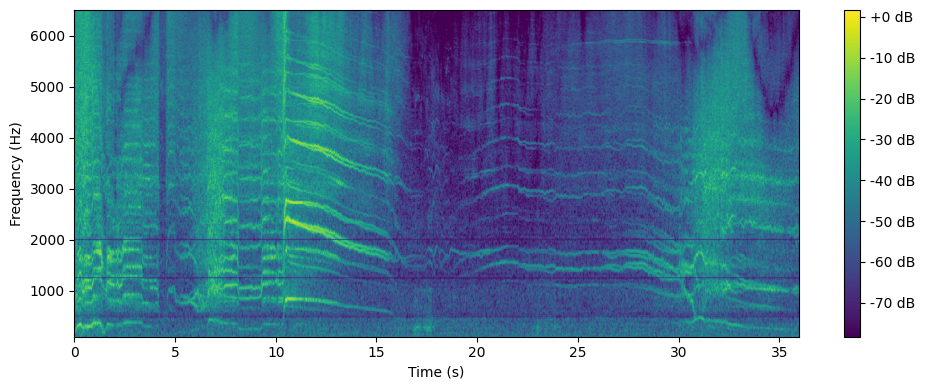

Saved figure as spectrogram_entire_drone_clip.png


In [87]:
# Get a filename where label is nature_chernobyl
filename = df[df["label"] == "racing_drone"]["file_name"].values[0]
filename
wav = load_wav_file(filename)
wav = normalize_audio_energy(wav)
spectrogram = to_log_mel_spectrogram(wav, 44100)
duration = len(wav) / 44100
figure = plot_spectrogram(spectrogram, duration)
save_figure(figure, "spectrogram_entire_drone_clip.png")